# Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import copy

# Data Import

In [4]:
df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")
pd.set_option('display.max_columns', None)
df_raw.head()

C:\Users\prima\AppData\Local\Temp\ipykernel_19504\736023655.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Columns Description

| Column Name | Description |
|------------|-------------|
| acc_now_delinq | Number of accounts on which the borrower is currently delinquent |
| addr_state | State provided by the borrower in the loan application |
| annual_inc | Self-reported annual income of the borrower |
| application_type | Indicates whether the loan is individual or joint application |
| collection_recovery_fee | Post charge-off collection fee |
| collections_12_mths_ex_med | Number of collections in the last 12 months excluding medical collections |
| delinq_2yrs | Number of 30+ days delinquency incidents in the past 2 years |
| desc | Loan description provided by the borrower |
| dti | Debt-to-income ratio excluding mortgage and requested loan |
| earliest_cr_line | Month when the borrower's earliest credit line was opened |
| emp_length | Employment length in years (0–10, where 10 means 10+ years) |
| emp_title | Job title provided by the borrower |
| funded_amnt | Total amount funded for the loan |
| funded_amnt_inv | Total amount funded by investors |
| grade | Loan grade assigned by Lending Club |
| home_ownership | Home ownership status (RENT, OWN, MORTGAGE, OTHER) |
| id | Unique loan listing ID |
| initial_list_status | Initial listing status of the loan (W, F) |
| inq_last_6mths | Number of credit inquiries in the past 6 months |
| installment | Monthly payment owed by the borrower |
| int_rate | Interest rate on the loan |
| issue_d | Month when the loan was issued |
| last_credit_pull_d | Most recent month credit was pulled |
| last_pymnt_amnt | Last payment amount received |
| last_pymnt_d | Month when the last payment was received |
| loan_amnt | Loan amount applied for by the borrower |
| loan_status | Current status of the loan (target variable) |
| member_id | Unique borrower ID |
| mths_since_last_delinq | Months since last delinquency |
| mths_since_last_major_derog | Months since most recent major derogatory event (90+ days late) |
| mths_since_last_record | Months since last public record |
| next_pymnt_d | Next scheduled payment date |
| open_acc | Number of open credit accounts |
| out_prncp | Remaining outstanding principal |
| out_prncp_inv | Remaining outstanding principal funded by investors |
| policy_code | Policy code (1 = publicly available, 2 = not publicly available) |
| pub_rec | Number of derogatory public records |
| purpose | Purpose of the loan |
| pymnt_plan | Indicates whether a payment plan is in place |
| recoveries | Post charge-off gross recovery |
| revol_bal | Total revolving credit balance |
| revol_util | Revolving credit utilization rate |
| sub_grade | Loan sub-grade assigned by Lending Club |
| term | Loan term in months (36 or 60) |
| title | Loan title provided by the borrower |
| tot_coll_amt | Total collection amounts ever owed |
| tot_cur_bal | Total current balance of all credit accounts |
| total_acc | Total number of credit accounts |
| total_pymnt | Total payments received to date |
| total_pymnt_inv | Total payments received by investors |
| total_rec_int | Total interest received |
| total_rec_late_fee | Total late fees received |
| total_rec_prncp | Total principal received |
| total_rev_hi_lim | Total revolving credit limit |
| url | URL of the loan listing page |
| verification_status | Income verification status |
| zip_code | First three digits of borrower’s ZIP code |


# Initial EDA

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df_raw.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


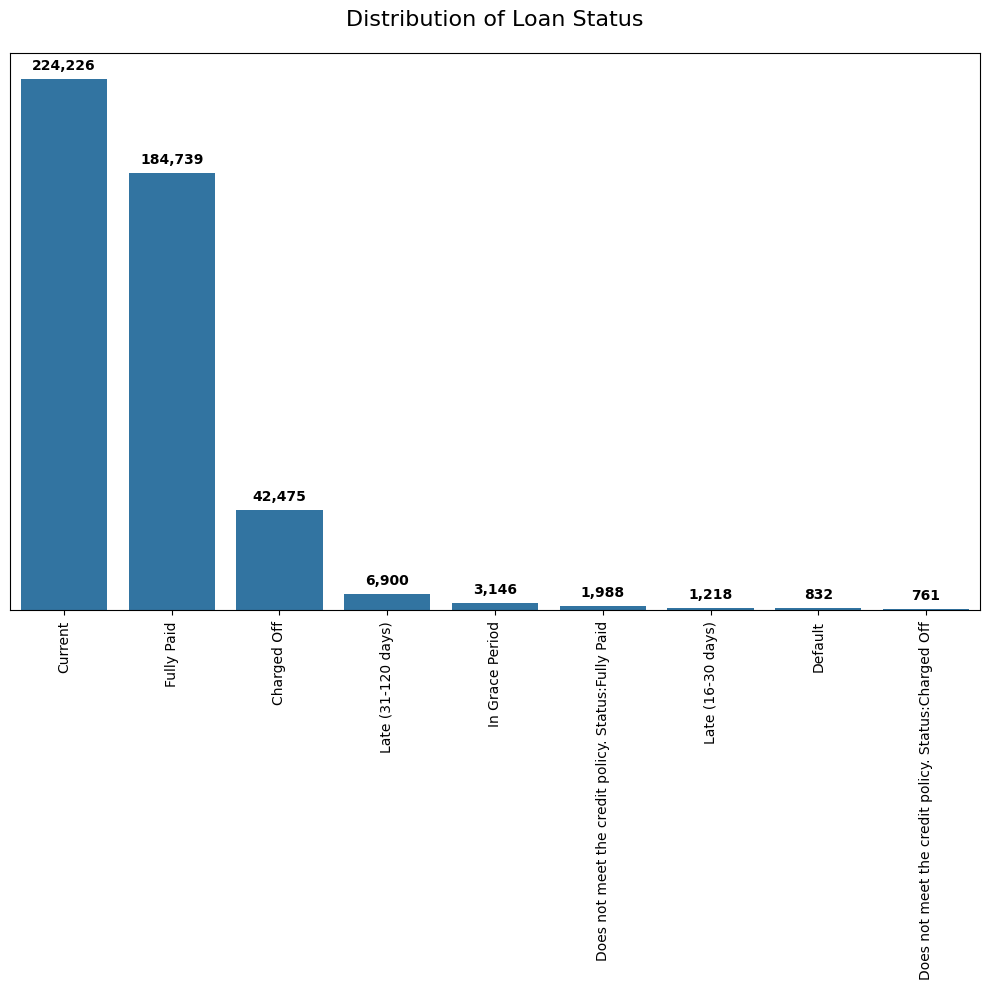

In [5]:
# Membuat plot dengan urutan dari terbesar ke terkecil
order = df_raw['loan_status'].value_counts().index

# Membuat plot
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_raw, x='loan_status', order=order)

# Memutar label sumbu x agar vertikal
plt.xticks(rotation=90)

# Menghapus label sumbu x dan y
ax.set(xlabel='', ylabel='')

# Menyembunyikan sumbu y
ax.yaxis.set_visible(False)

# Menambahkan judul
plt.title('Distribution of Loan Status', fontsize=16, pad=20)

# Menambahkan nilai count di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()
plt.show()

# Data Preparation

## Drop Unnecessary Columns

In [6]:
df_raw.dropna(axis = 1, how = "all", inplace = True)

In [7]:
drop_cols = [
    # Identifier
    "Unnamed: 0",
    "id",
    "member_id",
    "url",

    # Free text (unstable & noisy)
    "emp_title",
    "desc",
    "title",

    # Post-loan / payment leakage
    "funded_amnt",
    "funded_amnt_inv",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "next_pymnt_d",

    # Credit pulled after approval
    "last_credit_pull_d",

    # Redundant or not predictive
    "policy_code",
    "grade",
    "zip_code",

    # Single value
    "application_type"
]

In [8]:
df_raw.drop(columns = drop_cols, inplace = True)

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   installment                  466285 non-null  float64
 4   sub_grade                    466285 non-null  object 
 5   emp_length                   445277 non-null  object 
 6   home_ownership               466285 non-null  object 
 7   annual_inc                   466281 non-null  float64
 8   verification_status          466285 non-null  object 
 9   issue_d                      466285 non-null  object 
 10  loan_status                  466285 non-null  object 
 11  pymnt_plan                   466285 non-null  object 
 12  purpose                      466285 non-null  object 
 13 

In [10]:
continuous_cols = df_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(df_raw[continuous_cols],0.90)
corr_features

{'installment'}

In [13]:
df_raw.drop(columns=list(corr_features), inplace = True)

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   sub_grade                    466285 non-null  object 
 4   emp_length                   445277 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   issue_d                      466285 non-null  object 
 9   loan_status                  466285 non-null  object 
 10  pymnt_plan                   466285 non-null  object 
 11  purpose                      466285 non-null  object 
 12  addr_state                   466285 non-null  object 
 13 

In [15]:
df_raw.sample(10)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
136304,5000,36 months,17.77,D1,2 years,RENT,35000.00,Not Verified,May-13,Fully Paid,n,debt_consolidation,PA,23.11,1.0,Mar-01,1.0,12.0,NaN,11.0,0.0,11178,76.0,20.0,w,0.0,NaN,0.0,0.0,20447.0,14700.0
148204,8400,36 months,12.12,B3,2 years,RENT,55000.00,Not Verified,Apr-13,Fully Paid,n,debt_consolidation,IL,16.30,0.0,Jul-01,0.0,NaN,NaN,7.0,0.0,8051,61.9,32.0,f,0.0,NaN,0.0,0.0,302486.0,13000.0
285009,30000,60 months,10.99,B3,10+ years,RENT,99955.68,Verified,Oct-14,Current,n,debt_consolidation,GA,23.48,0.0,Mar-00,0.0,33.0,NaN,11.0,0.0,14326,31.9,24.0,w,0.0,33.0,0.0,0.0,36759.0,44900.0
194246,8000,36 months,10.16,B1,6 years,OWN,30000.00,Not Verified,Oct-12,Fully Paid,n,debt_consolidation,CA,13.56,0.0,Jun-07,0.0,NaN,NaN,6.0,0.0,3889,30.6,7.0,f,0.0,NaN,0.0,0.0,8874.0,12700.0
99805,30000,60 months,25.99,G4,10+ years,RENT,125000.00,Verified,Aug-13,Charged Off,n,debt_consolidation,NY,12.80,0.0,Sep-99,2.0,26.0,NaN,14.0,0.0,20244,80.7,35.0,f,0.0,NaN,0.0,0.0,106821.0,25100.0
152083,3825,36 months,21.00,E2,4 years,RENT,15900.00,Not Verified,Apr-13,Current,n,car,CA,15.14,0.0,Feb-09,1.0,NaN,NaN,8.0,0.0,1719,21.8,11.0,w,0.0,NaN,0.0,0.0,5479.0,7900.0
184356,33425,60 months,21.98,E4,10+ years,MORTGAGE,75000.00,Verified,Nov-12,Fully Paid,n,debt_consolidation,WA,13.84,0.0,Jun-02,1.0,48.0,NaN,14.0,0.0,6142,25.1,24.0,f,0.0,NaN,0.0,0.0,148504.0,24500.0
30216,24000,36 months,14.22,C5,3 years,RENT,170000.00,Verified,May-10,Fully Paid,n,debt_consolidation,CT,8.80,0.0,Apr-73,1.0,38.0,NaN,11.0,0.0,7482,20.6,24.0,f,0.0,NaN,0.0,NaN,NaN,NaN
353976,10000,36 months,10.15,B2,2 years,MORTGAGE,39388.25,Not Verified,Jul-14,Current,n,credit_card,FL,19.07,0.0,Feb-01,1.0,47.0,NaN,8.0,0.0,10713,70.5,25.0,f,0.0,47.0,0.0,0.0,88343.0,15200.0
333608,4500,36 months,12.49,B5,10+ years,RENT,55000.00,Not Verified,Jul-14,Current,n,medical,NY,4.84,0.0,Dec-87,0.0,NaN,NaN,4.0,0.0,8467,68.3,8.0,f,0.0,NaN,0.0,0.0,8467.0,12400.0


## Date Parsing

In [16]:
def parse_earliest_cr_line(val):
    if pd.isna(val):
        return pd.NaT
    
    month_str, year_str = val.split("-")
    year = int(year_str)
    
    # aturan century
    if year >= 30:
        year += 1900
    else:
        year += 2000
    
    return pd.to_datetime(f"{year}-{month_str}-01", format="%Y-%b-%d")


In [17]:
df_raw["earliest_cr_line"] = df_raw["earliest_cr_line"].apply(parse_earliest_cr_line)

In [18]:
df_raw["issue_d"] = df_raw["issue_d"].apply(parse_earliest_cr_line)

In [19]:
(df_raw["earliest_cr_line"] > df_raw["issue_d"]).sum()

np.int64(0)

In [20]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  pymnt_plan                   466285 non-null  object        
 11  purpose                   

In [21]:
for col in df_raw.columns:
    if df_raw[col].dtype == "float64":
        s = df_raw[col]
        is_integer_like = np.all(np.isclose(s.dropna() % 1, 0))
        if is_integer_like:
            df_raw[col] = s.astype("Int64")

In [22]:
int_cols = df_raw.select_dtypes(include='int64').columns
df_raw[int_cols] = df_raw[int_cols].astype('Int64')

In [23]:
df = copy.deepcopy(df_raw)
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0,1985-01-01,1,<NA>,<NA>,3,0,13648,83.7,9,f,0,<NA>,0,<NA>,<NA>,<NA>
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0,1999-04-01,5,<NA>,<NA>,3,0,1687,9.4,4,f,0,<NA>,0,<NA>,<NA>,<NA>
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0,2001-11-01,2,<NA>,<NA>,2,0,2956,98.5,10,f,0,<NA>,0,<NA>,<NA>,<NA>
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0,1996-02-01,1,35,<NA>,10,0,5598,21.0,37,f,0,<NA>,0,<NA>,<NA>,<NA>
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0,1996-01-01,0,38,<NA>,15,0,27783,53.9,38,f,0,<NA>,0,<NA>,<NA>,<NA>


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  pymnt_plan                   466285 non-null  object        
 11  purpose                   

## Feature Engineering

In [25]:
df["credit_history_months"] = (
    (df["issue_d"] - df["earliest_cr_line"]).dt.days / 30
)

In [26]:
df.loc[df["issue_d"]<df["earliest_cr_line"], ["issue_d", "earliest_cr_line"]].shape[0]

0

In [27]:
df.drop(columns = ["issue_d", "earliest_cr_line"], inplace = True)

In [28]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,0,1,<NA>,<NA>,3,0,13648,83.7,9,f,0,<NA>,0,<NA>,<NA>,<NA>,327.666667
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,0,5,<NA>,<NA>,3,0,1687,9.4,4,f,0,<NA>,0,<NA>,<NA>,<NA>,154.233333
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,0,2,<NA>,<NA>,2,0,2956,98.5,10,f,0,<NA>,0,<NA>,<NA>,<NA>,122.733333
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,CA,20.00,0,1,35,<NA>,10,0,5598,21.0,37,f,0,<NA>,0,<NA>,<NA>,<NA>,192.733333
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,OR,17.94,0,0,38,<NA>,15,0,27783,53.9,38,f,0,<NA>,0,<NA>,<NA>,<NA>,193.766667


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  Int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   sub_grade                    466285 non-null  object 
 4   emp_length                   445277 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   loan_status                  466285 non-null  object 
 9   pymnt_plan                   466285 non-null  object 
 10  purpose                      466285 non-null  object 
 11  addr_state                   466285 non-null  object 
 12  dti                          466285 non-null  float64
 13 

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
continuous_cols = df.select_dtypes(include=["Int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Length of categorical columns: ", len(categorical_cols))
print("Continuous columns:", continuous_cols)
print("Length of continuous columns: ", len(continuous_cols))

Categorical columns: ['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status']
Length of categorical columns:  10
Continuous columns: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credit_history_months']
Length of continuous columns:  20


## Feature Selection

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  Int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   sub_grade                    466285 non-null  object 
 4   emp_length                   445277 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   loan_status                  466285 non-null  object 
 9   pymnt_plan                   466285 non-null  object 
 10  purpose                      466285 non-null  object 
 11  addr_state                   466285 non-null  object 
 12  dti                          466285 non-null  float64
 13 

In [33]:
df.isnull().mean().sort_values(ascending=False)

mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
mths_since_last_delinq         0.536906
total_rev_hi_lim               0.150715
tot_cur_bal                    0.150715
tot_coll_amt                   0.150715
emp_length                     0.045054
revol_util                     0.000729
collections_12_mths_ex_med     0.000311
delinq_2yrs                    0.000062
open_acc                       0.000062
pub_rec                        0.000062
total_acc                      0.000062
inq_last_6mths                 0.000062
credit_history_months          0.000062
acc_now_delinq                 0.000062
annual_inc                     0.000009
purpose                        0.000000
dti                            0.000000
addr_state                     0.000000
sub_grade                      0.000000
home_ownership                 0.000000
loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000


## Handling Missing Values

In [34]:
cols = [
    "mths_since_last_record",
    "mths_since_last_major_derog",
    "mths_since_last_delinq"
]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(0)

In [35]:
cols = ["total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(df[col].median())

In [36]:
# 1. Copy kolom
df["emp_length_num"] = df["emp_length"]

# 2. Cleaning text → numerik
df["emp_length_num"] = (
    df["emp_length_num"]
    .str.replace("10+ years", "10", regex=False)
    .str.replace("< 1 year", "0", regex=False)
    .str.replace(" years", "", regex=False)
    .str.replace(" year", "", regex=False)
    .astype(float)
)

# 3. Missing indicator
df["emp_length_missing"] = df["emp_length_num"].isna().astype("Int64")

# 4. Imputasi median
df["emp_length_num"] = df["emp_length_num"].fillna(
    df["emp_length_num"].median()
)

# 5. Drop kolom lama
df = df.drop(columns=["emp_length"])

In [37]:
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["annual_inc"] = df["annual_inc"].fillna(df["annual_inc"].median())

In [38]:
cols = [
    "collections_12_mths_ex_med", "delinq_2yrs", "open_acc",
    "pub_rec", "total_acc", "inq_last_6mths",
    "acc_now_delinq", "credit_history_months"
]

df[cols] = df[cols].fillna(0)

## Data Encoding

In [39]:
loan_status_mapping = {
    # GOOD
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0,

    # BAD
    "Charged Off": 1,
    "Default": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
}

In [40]:
df["status"] = df["loan_status"].map(loan_status_mapping)
df = df.dropna(subset=["status"])
df["status"] = df["status"].astype("Int64")
df = df.drop(columns=["loan_status"])
df["status"].value_counts(normalize=True)

status
0    0.80906
1    0.19094
Name: proportion, dtype: Float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  Int64  
 1   term                                 230795 non-null  object 
 2   int_rate                             230795 non-null  float64
 3   sub_grade                            230795 non-null  object 
 4   home_ownership                       230795 non-null  object 
 5   annual_inc                           230795 non-null  float64
 6   verification_status                  230795 non-null  object 
 7   pymnt_plan                           230795 non-null  object 
 8   purpose                              230795 non-null  object 
 9   addr_state                           230795 non-null  object 
 10  dti                                  230795 non-null  float64
 11  delinq_2yrs       

## Outlier Detection

In [42]:
def check_outlier_iqr(series, factor=1.5):
    """
    Check apakah suatu kolom memiliki outlier berdasarkan metode IQR.

    Parameters
    ----------
    series : pd.Series
        Kolom numerik
    factor : float
        Faktor IQR (default = 1.5)

    Returns
    -------
    dict
        {
            'has_outlier': bool,
            'n_outliers': int,
            'lower_bound': float,
            'upper_bound': float
        }
    """
    s = series.dropna()

    # Jika kolom kosong atau hanya 1 nilai unik
    if s.empty or s.nunique() <= 1:
        return {
            "has_outlier": False,
            "n_outliers": 0,
            "lower_bound": np.nan,
            "upper_bound": np.nan
        }

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    n_outliers = ((s < lower_bound) | (s > upper_bound)).sum()

    return {
        "has_outlier": n_outliers > 0,
        "n_outliers": int(n_outliers),
        "lower_bound": float(lower_bound),
        "upper_bound": float(upper_bound)
    }

In [43]:
numeric_cols = df.select_dtypes(include=["Int64", "float64"]).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'credit_history_months', 'mths_since_last_record_missing',
       'mths_since_last_major_derog_missing', 'mths_since_last_delinq_missing',
       'total_rev_hi_lim_missing', 'tot_cur_bal_missing',
       'tot_coll_amt_missing', 'emp_length_num', 'emp_length_missing',
       'status'],
      dtype='object')

In [44]:
outlier_report = {}

for col in numeric_cols:
    outlier_report[col] = check_outlier_iqr(df[col])

In [45]:
outlier_df = (
    pd.DataFrame(outlier_report)
    .T
    .sort_values("has_outlier", ascending=False)
)

outlier_df


,has_outlier,n_outliers,lower_bound,upper_bound
loan_amnt,True,6944,-9000.0,34200.0
total_acc,True,3263,-8.0,56.0
emp_length_missing,True,8755,0.0,0.0
mths_since_last_major_derog_missing,True,40232,1.0,1.0
mths_since_last_record_missing,True,27646,1.0,1.0
credit_history_months,True,7730,-22.183333,375.283333
total_rev_hi_lim,True,23029,-2700.0,48500.0
tot_cur_bal,True,16261,-132876.5,329151.5
tot_coll_amt,True,18167,0.0,0.0
acc_now_delinq,True,599,0.0,0.0


In [46]:
cols_with_outliers = outlier_df[outlier_df["has_outlier"]].index.tolist()
cols_with_outliers

['loan_amnt',
 'total_acc',
 'emp_length_missing',
 'mths_since_last_major_derog_missing',
 'mths_since_last_record_missing',
 'credit_history_months',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'acc_now_delinq',
 'int_rate',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'revol_util',
 'revol_bal',
 'pub_rec',
 'open_acc',
 'mths_since_last_record',
 'mths_since_last_delinq',
 'inq_last_6mths',
 'delinq_2yrs',
 'dti',
 'annual_inc',
 'status']

In [47]:
cols_without_outliers = outlier_df[~outlier_df["has_outlier"]].index.tolist()
cols_without_outliers

['mths_since_last_delinq_missing',
 'total_rev_hi_lim_missing',
 'tot_cur_bal_missing',
 'tot_coll_amt_missing',
 'emp_length_num']

## Outlier Handling

In [48]:
time_since_cols = [
    "mths_since_last_delinq",
    "mths_since_last_record",
    "mths_since_last_major_derog"
]

In [49]:
CAP_MONTHS = 36

In [50]:
for col in time_since_cols:
    df[col] = df[col].where(
        (df[col] == 0) | (df[col] <= CAP_MONTHS),
        CAP_MONTHS
    )

In [51]:
for col in time_since_cols:
    df[f"{col}_outlier"] = (df[col] == CAP_MONTHS).astype("Int64")

In [52]:
def handle_outlier_column(
    df: pd.DataFrame,
    col: str,
    lower_q: float = 0.01,
    upper_q: float = 0.99
):
    """
    Automatic outlier handling + indicator creation
    """

    s = df[col]
    non_null = s.dropna()

    # ===== karakteristik dasar =====
    is_integer_like = np.all(np.isclose(non_null, non_null.astype(int)))
    is_non_negative = (non_null >= 0).all()
    skewness = skew(non_null)
    zero_ratio = (non_null == 0).mean()

    # ===== hitung quantile =====
    lower = non_null.quantile(lower_q)
    upper = non_null.quantile(upper_q)

    # ===== outlier indicator =====
    df[f"{col}_outlier"] = (
        (s < lower) | (s > upper)
    ).astype("Int64")

    # ===== RULE ENGINE =====

    # 1️⃣ COUNT FEATURES (delinq, inq, acc, pub_rec)
    if is_integer_like and is_non_negative and non_null.max() < 100:
        df[col] = s.clip(lower=0, upper=upper)
        method = "cap_count"

    # 2️⃣ RATIO / PERCENTAGE
    elif col.endswith(("util", "rate", "ratio")) or non_null.max() <= 150:
        df[col] = s.clip(lower=0, upper=100)
        method = "cap_ratio"

    # 3️⃣ HEAVILY RIGHT-SKEWED FINANCIAL
    elif skewness > 2:
        df[col] = np.log1p(s.clip(lower=0))
        method = "log_transform"

    # 4️⃣ GENERAL CONTINUOUS → ROBUST CAP
    else:
        df[col] = s.clip(lower=lower, upper=upper)
        method = "robust_cap"

    return {
        "column": col,
        "skewness": round(skewness, 2),
        "zero_ratio": round(zero_ratio, 3),
        "method_applied": method,
        "lower_bound": round(lower, 2),
        "upper_bound": round(upper, 2)
    }

In [53]:
outlier_columns = [
    "loan_amnt",
    "annual_inc",
    "revol_bal",
    "tot_cur_bal",
    "total_rev_hi_lim",
    "tot_coll_amt",
    "int_rate",
    "dti",
    "revol_util"
]

In [54]:
summary = []

for col in outlier_columns:
    result = handle_outlier_column(df, col)
    summary.append(result)

outlier_summary = pd.DataFrame(summary)

In [55]:
outlier_summary

,column,skewness,zero_ratio,method_applied,lower_bound,upper_bound
0,loan_amnt,0.85,0.000,robust_cap,1500.00,35000.00
1,annual_inc,31.42,0.000,log_transform,18000.00,235000.00
2,revol_bal,15.24,0.008,log_transform,54.94,80631.22
3,tot_cur_bal,4.23,0.000,log_transform,4018.94,585250.60
4,total_rev_hi_lim,10.69,0.000,log_transform,3500.00,116853.00
5,tot_coll_amt,476.67,0.921,log_transform,0.00,1839.06
6,int_rate,0.33,0.000,cap_ratio,6.03,24.70
7,dti,0.18,0.001,cap_ratio,1.18,33.81
8,revol_util,-0.09,0.008,cap_ratio,0.50,97.70


In [56]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months,mths_since_last_record_missing,mths_since_last_major_derog_missing,mths_since_last_delinq_missing,total_rev_hi_lim_missing,tot_cur_bal_missing,tot_coll_amt_missing,emp_length_num,emp_length_missing,status,mths_since_last_delinq_outlier,mths_since_last_record_outlier,mths_since_last_major_derog_outlier,loan_amnt_outlier,annual_inc_outlier,revol_bal_outlier,tot_cur_bal_outlier,total_rev_hi_lim_outlier,tot_coll_amt_outlier,int_rate_outlier,dti_outlier,revol_util_outlier
0,5000,36 months,10.65,B2,RENT,10.085851,Verified,n,credit_card,AZ,27.65,0,1,0,0,3,0,9.521422,83.7,9,f,0,0,0,0.0,11.308849,10.03456,327.666667,1,1,1,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,60 months,15.27,C4,RENT,10.308986,Source Verified,n,car,GA,1.00,0,5,0,0,3,0,7.4313,9.4,4,f,0,0,0,0.0,11.308849,10.03456,154.233333,1,1,1,1,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2400,36 months,15.96,C5,RENT,9.413526,Not Verified,n,small_business,IL,8.72,0,2,0,0,2,0,7.991931,98.5,10,f,0,0,0,0.0,11.308849,10.03456,122.733333,1,1,1,1,1,1,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,10000,36 months,13.49,C1,RENT,10.803669,Source Verified,n,other,CA,20.00,0,1,35,0,10,0,8.630343,21.0,37,f,0,0,0,0.0,11.308849,10.03456,192.733333,1,1,0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000,36 months,7.90,A4,RENT,10.491302,Source Verified,n,wedding,AZ,11.20,0,3,0,0,9,0,8.982687,28.3,12,f,0,0,0,0.0,11.308849,10.03456,86.200000,1,1,1,1,1,1,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  Int64  
 1   term                                 230795 non-null  object 
 2   int_rate                             230795 non-null  float64
 3   sub_grade                            230795 non-null  object 
 4   home_ownership                       230795 non-null  object 
 5   annual_inc                           230795 non-null  float64
 6   verification_status                  230795 non-null  object 
 7   pymnt_plan                           230795 non-null  object 
 8   purpose                              230795 non-null  object 
 9   addr_state                           230795 non-null  object 
 10  dti                                  230795 non-null  float64
 11  delinq_2yrs       

## Post-cleaning EDA

In [58]:
df["status"].value_counts(normalize=True)

status
0    0.80906
1    0.19094
Name: proportion, dtype: Float64

In [59]:
num_cols = df.select_dtypes(
    include=["int64", "float64", "Int64", "Float64"]
).columns

In [60]:
num_cols_eda = [
    col for col in num_cols
    if not (col.endswith("_missing") or col.endswith("_outlier"))
]

In [61]:
num_cols_eda = [
    col for col in num_cols_eda
    if col != "status"
]

In [62]:
print(len(num_cols_eda))
num_cols_eda

21


['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'credit_history_months',
 'emp_length_num']

In [63]:
# Histogram + Boxplot
hist_box_cols = [
    'loan_amnt',
    'int_rate',
    'annual_inc',
    'dti',
    'revol_bal',
    'revol_util',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'tot_coll_amt',
    'credit_history_months'
]

# Histogram only
hist_only_cols = [
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'total_acc',
    'pub_rec',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'emp_length_num'
]

# Boxplot only
box_only_cols = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog'
]


In [64]:
def histplot_visual(data,column,n_row,n_col):
    fig, ax = plt.subplots(n_row,n_col,figsize=(15,15))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)

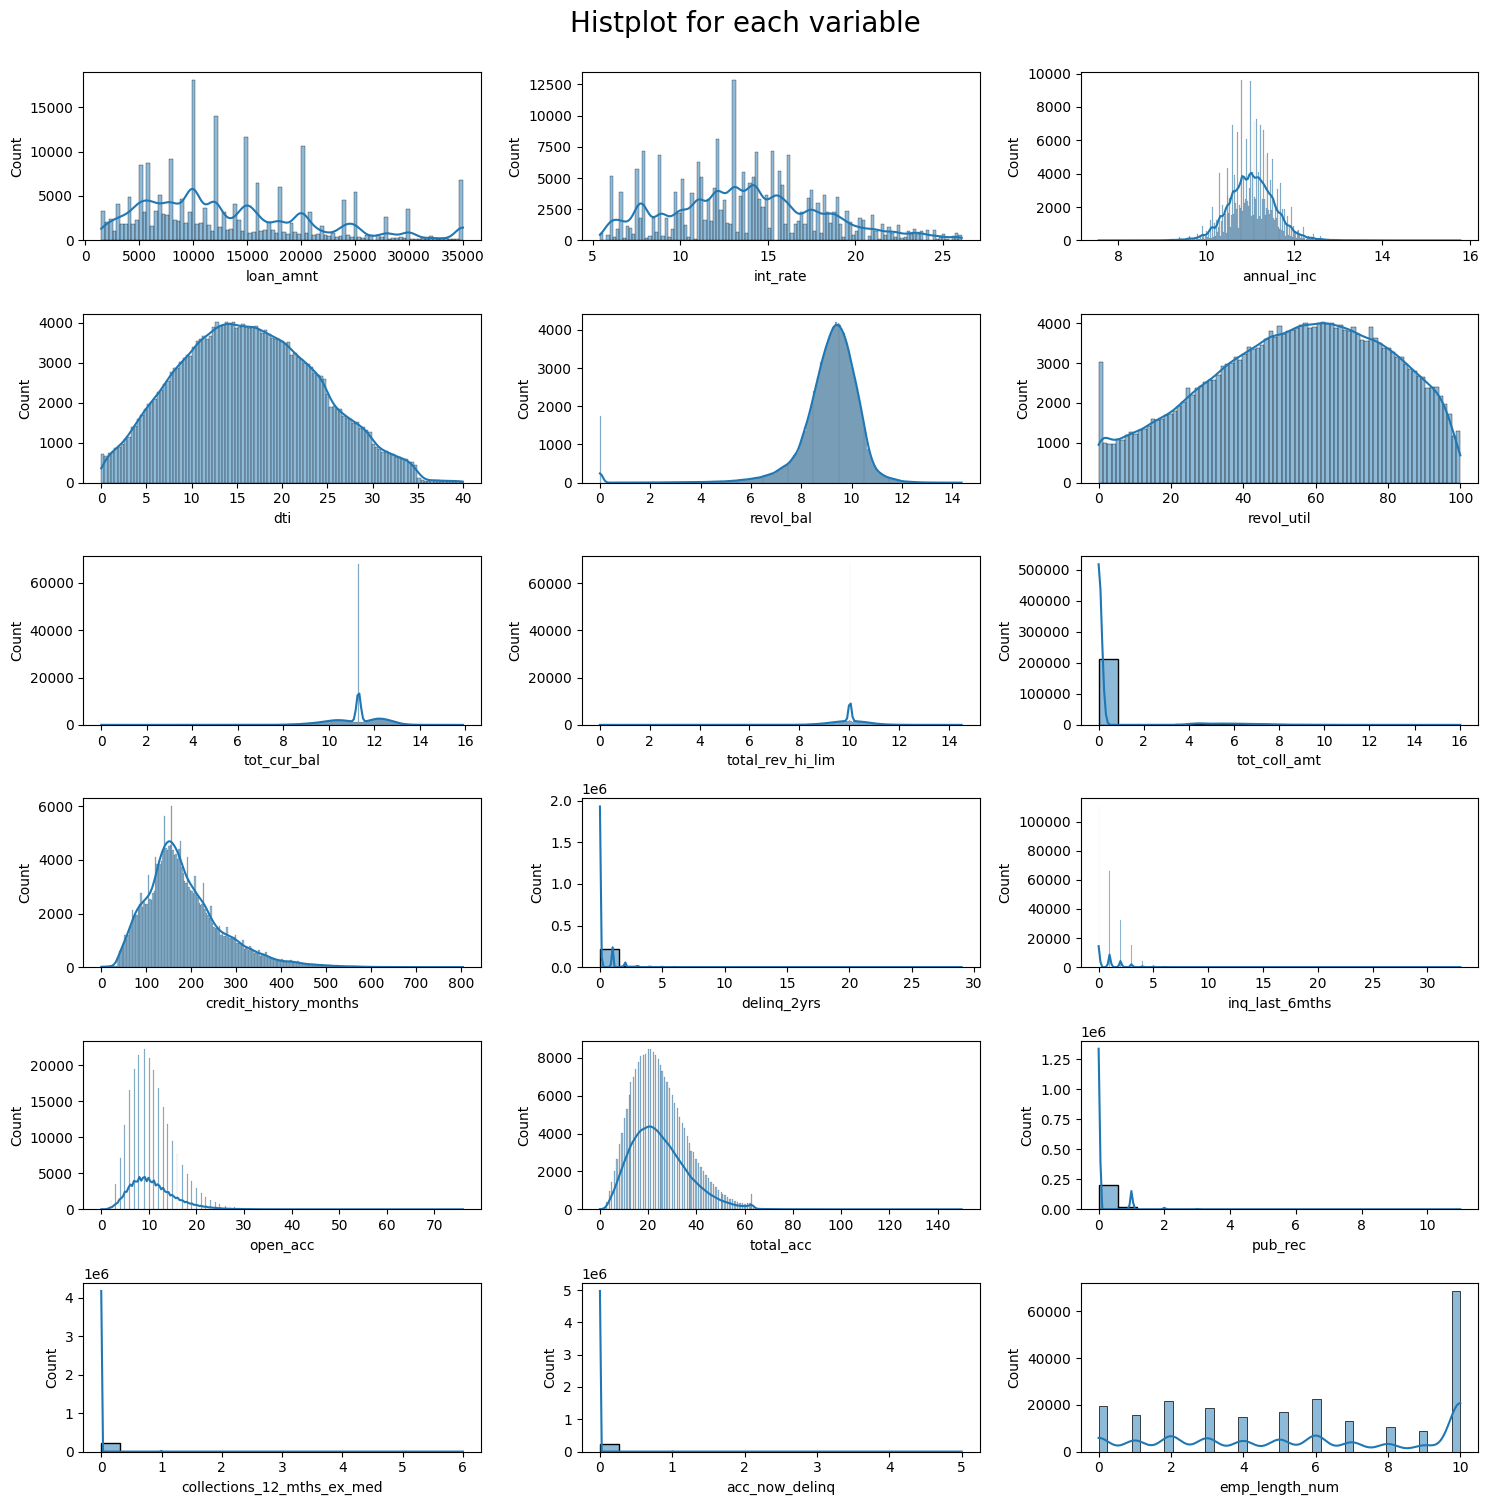

In [65]:
histplot_visual(data=df,column=hist_box_cols+hist_only_cols, n_row = 6, n_col = 3)
plt.tight_layout()

In [66]:
def boxplots_visual(data, columns, n_row, n_col, by=None):
    fig, ax = plt.subplots(n_row, n_col, figsize=(15, 15))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax = ax.flatten()

    for i, feature in enumerate(columns):
        if by is None:
            # Boxplot biasa (tanpa kategori)
            sns.boxplot(
                x=data[feature],
                ax=ax[i],
                orient='h'
            )
        else:
            # Boxplot berdasarkan kategori
            sns.boxplot(
                x=feature,
                y=by,
                data=data,
                ax=ax[i],
                orient='h'
            )

        skewness = round(data[feature].skew(skipna=True), 2)
        ax[i].set_title(f'{feature}, skewness: {skewness}', fontsize=10)

    # Hapus axis kosong jika jumlah kolom < grid
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()


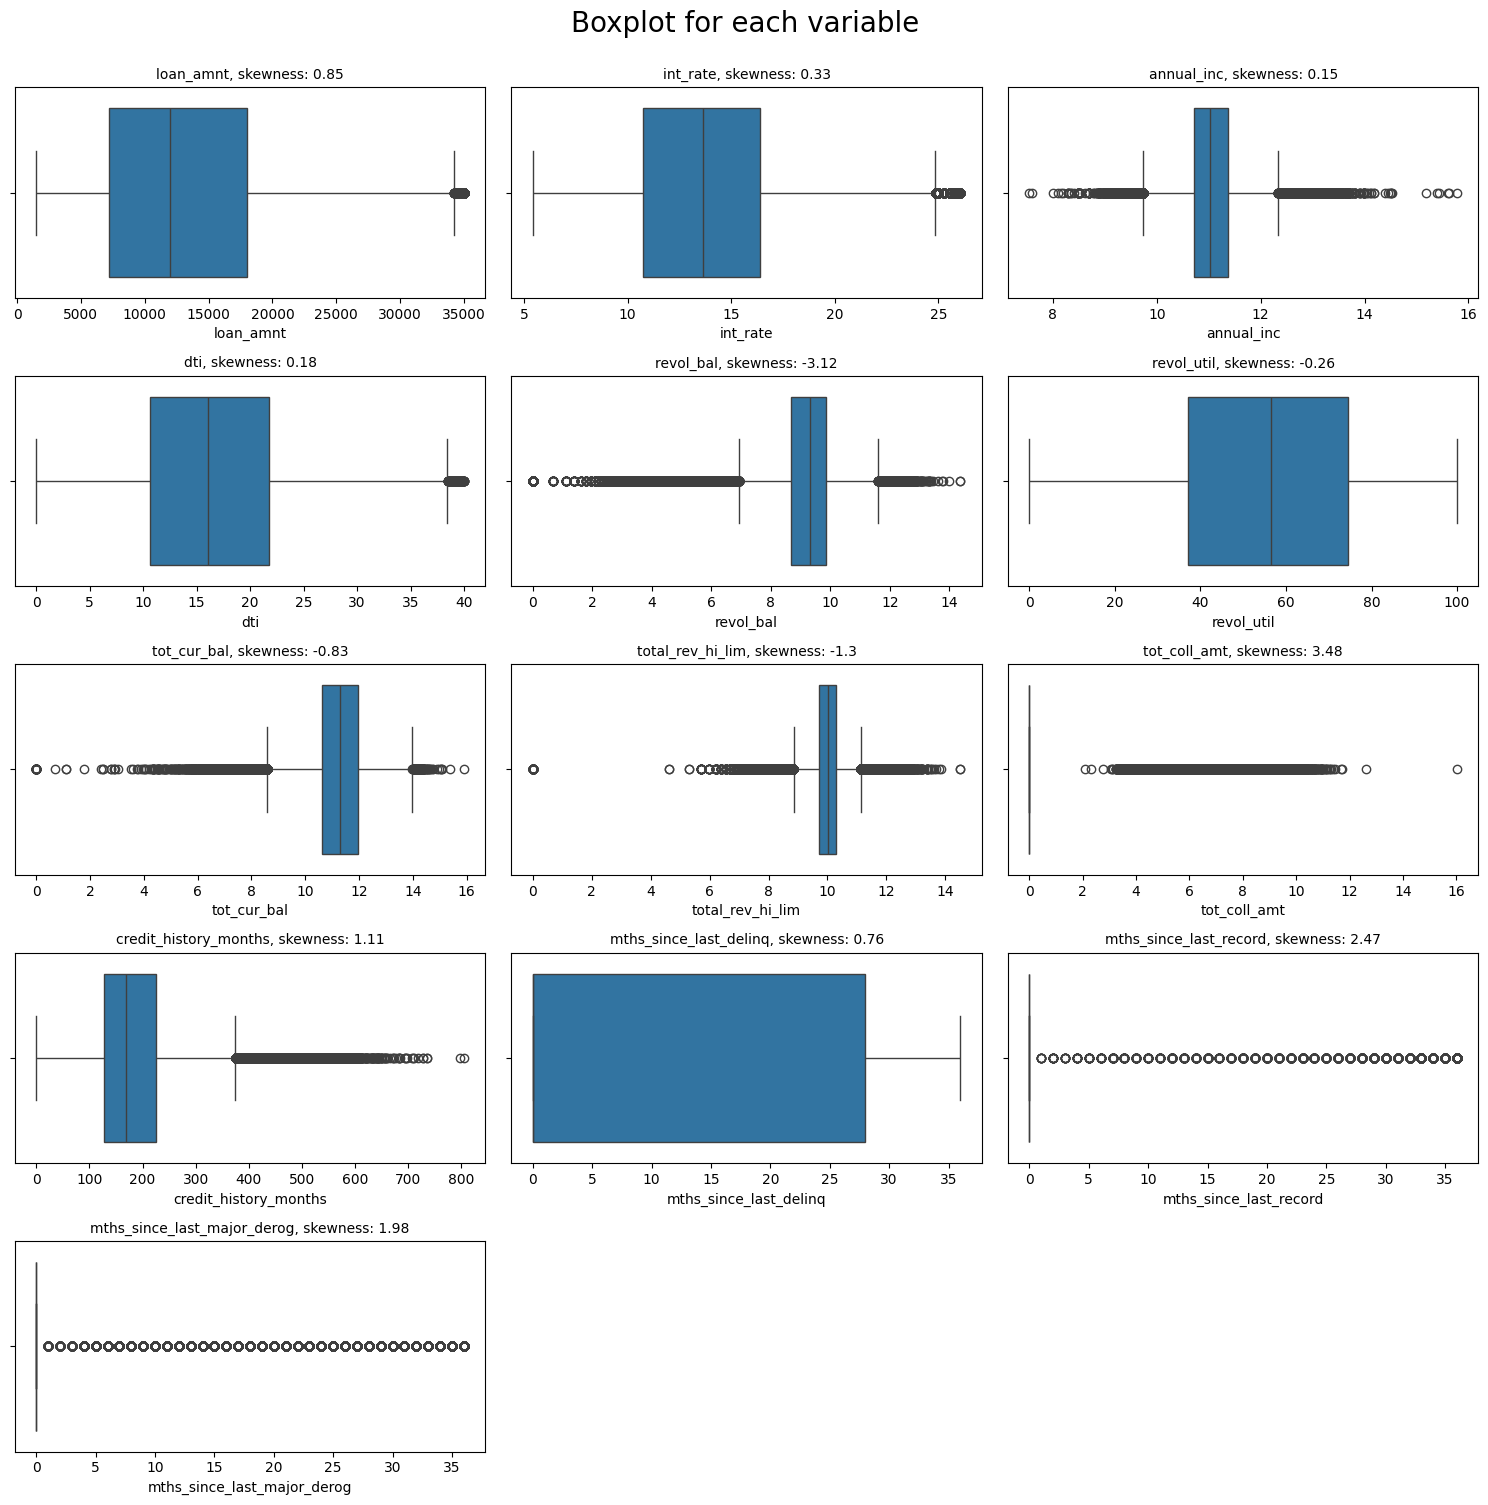

<Figure size 640x480 with 0 Axes>

In [67]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3)
plt.tight_layout()

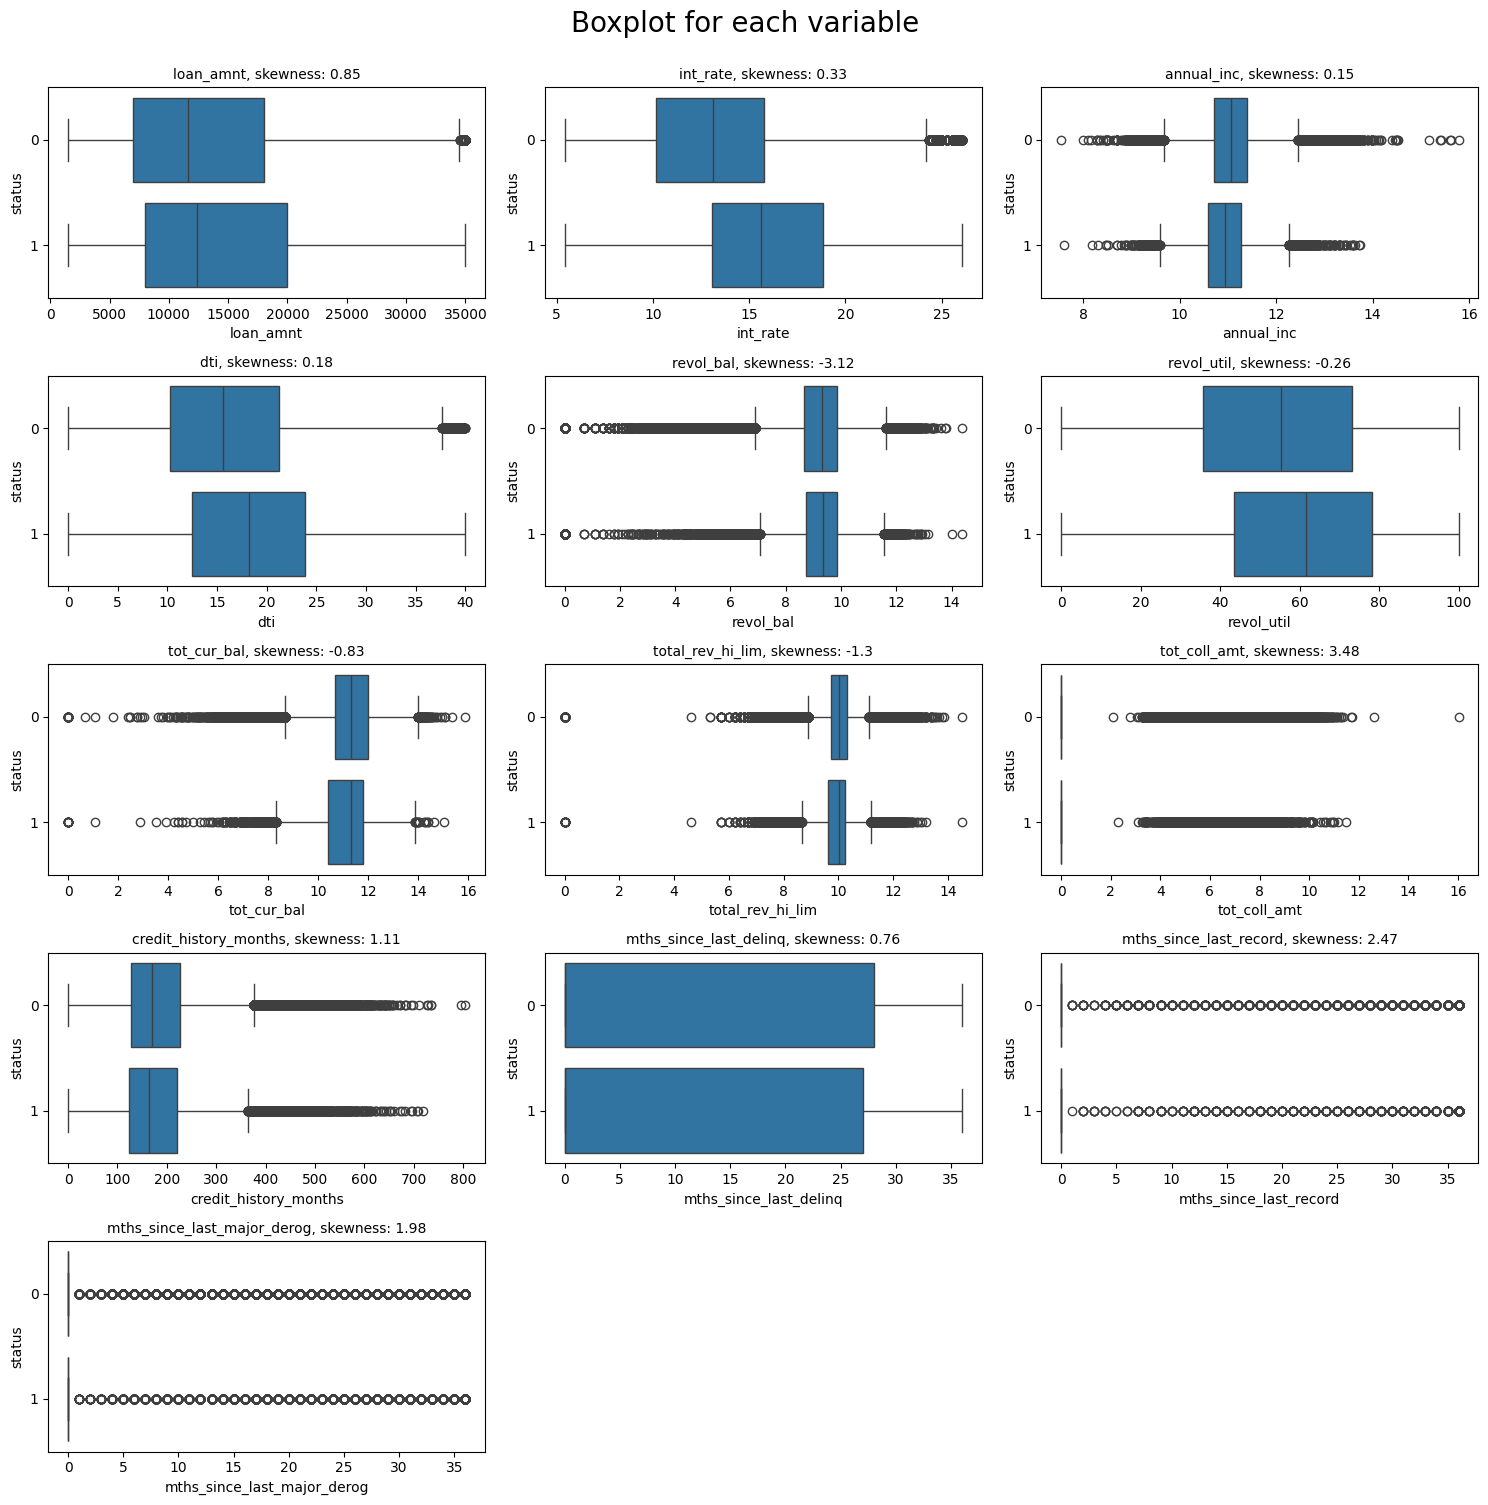

<Figure size 640x480 with 0 Axes>

In [68]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3, by = "status")
plt.tight_layout()